## Feature Engineering in Machine Learning

* Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process.

1 Feature Selection

2 Feature Reduction

3 Feature Creation

### Import Required Libraries

In [2]:
import pandas as pd
import numpy as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\Data Sets\ML Datasets\\Mobile Price Classification.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In this data set every column contains specific values.. Every column names mean

* battery_power -> Total energy a battery can store in one time measured in mAh
* blue -> Has bluetooth or not
* clock_speed -> speed at which microprocessor executes instructions
* dual_sim -> Has dual sim support or not
* fc -> Front Camera mega pixels
* four_g -> Has 4G or not
* int_memory -> Internal Memory in Gigabytes
* m_dep -> Mobile Depth in cm
* mobile_wt -> Weight of mobile phone
* n_cores -> Number of cores of processor
* pc. -> Primary Camera mega pixels
* px_height -> Pixel Resolution Height
* px_width -> Pixel Resolution Width
* ram -> Random Access Memory in Mega Bytes
* sc_h. -> Screen Height of mobile in cm
* sc_w -> Screen Width of mobile in cm
* talk_time -> longest time that a single battery charge will last when you are
* three_g -> Has 3G or not
* touch_screen -> Has touch screen or not
* wifi -> Has wifi or not
* price_range -> This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [8]:
train.shape

(2000, 21)

### Filter Methods
**Method 1 Univariate Selection**

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
X=df.iloc[:,0:20]
y=df.iloc[:,-1]

In [14]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X,y)

In [18]:
dfscores=pd.DataFrame(fit.scores_)
dfscores

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [20]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [21]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(10,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


**Method 2 Feature Importance**

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

In [24]:
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.06107769 0.0192468  0.0333744  0.01899694 0.03211109 0.01698986
 0.03366286 0.03368082 0.03597489 0.03243646 0.03202564 0.04665498
 0.04857605 0.40256834 0.03349916 0.03281232 0.03446693 0.01411307
 0.0185125  0.01921918]


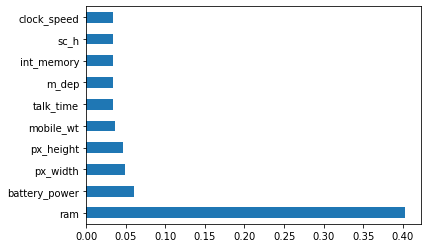

In [26]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Method 3 Correlation Matrix**

<AxesSubplot:>

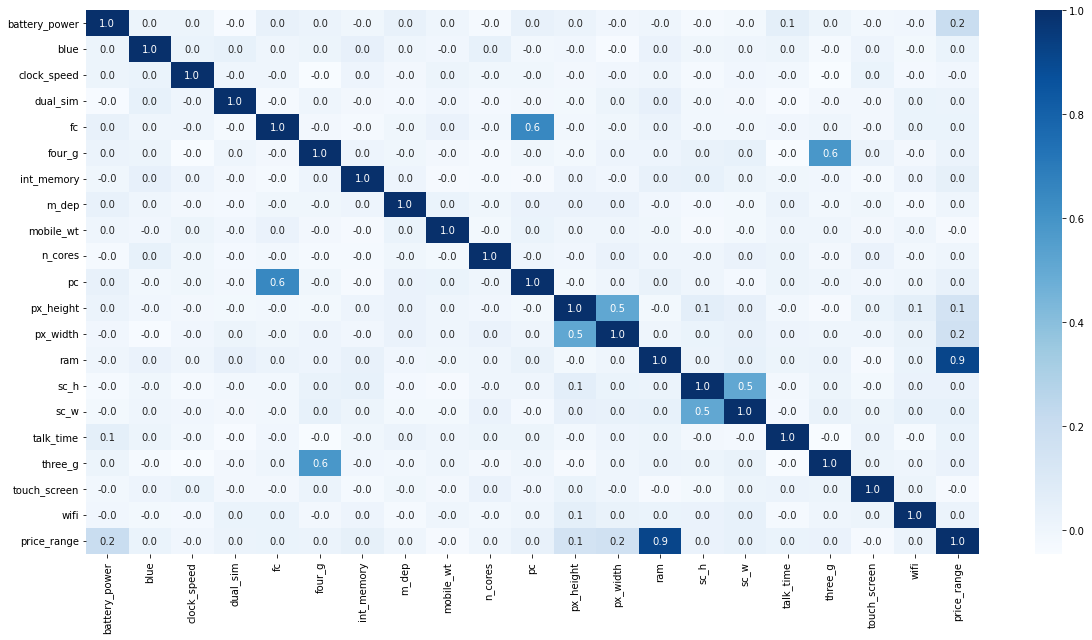

In [31]:
corrmat=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrmat, annot=True, cmap='Blues',fmt='.5f')

**ram, battery_power,px_width,px_height are highly correlated to Target column ie price_range**

### Wrapper method

In [37]:
!pip install mlxtend
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)


In [42]:
boston=load_boston()
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE']=pd.Series(boston.target)

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
df.shape

(506, 14)

In [48]:
X=df.iloc[:,:13]
y=df.iloc[:,-1]

In [53]:
sfs=SFS(LinearRegression(),
       k_features=5,
       floating=False,
       scoring='r2',
       cv=0)

#use sfs to select top 5 features
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2')

In [56]:
df_sfs_results=pd.DataFrame(sfs.subsets_).transpose()
df_sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)",[0.5441462975864799],0.544146,"(LSTAT,)"
2,"(5, 12)",[0.6385616062603403],0.638562,"(RM, LSTAT)"
3,"(5, 10, 12)",[0.6786241601613112],0.678624,"(RM, PTRATIO, LSTAT)"
4,"(5, 7, 10, 12)",[0.6903077016842538],0.690308,"(RM, DIS, PTRATIO, LSTAT)"
5,"(4, 5, 7, 10, 12)",[0.7080892893529662],0.708089,"(NOX, RM, DIS, PTRATIO, LSTAT)"


### Backward Elimination

In [62]:
from sklearn.feature_selection import RFE

In [59]:
X=boston.data
y=boston.target

In [63]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=5,step=1)
fit=selector.fit(X,y)

In [68]:
df_RFE_results=[]
for i in range(X.shape[1]):
    df_RFE_results.append(
    {
        'Feature_names':boston.feature_names[i],
        'Selected':selector.support_[i],
        'RFE_ranking':selector.ranking_[i]
    }
    )
    
df_RFE_results=pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,CRIM,False,4
1,ZN,False,6
2,INDUS,False,5
3,CHAS,True,1
4,NOX,True,1
5,RM,True,1
6,AGE,False,9
7,DIS,True,1
8,RAD,False,3
